## ÌîÑÎ°úÏ†ùÌä∏02
- ÌîÑÎ°úÏ†ùÌä∏01Í≥º Í∞ôÏùå
  - ÌîÑÎ°úÏ†ùÌä∏01Ïù¥ Ï†ÑÏ≤òÎ¶¨, logisticÍπåÏßÄÏòÄÏúºÎÇò ÏÇ¨Ïã§ÏÉÅ Î™®Îç∏ÎßÅÎèÑ ÏàòÌñâÌï¥ Î¥Ñ
  - Îç∞Ïù¥ÌÑ∞Îäî kaggleÏóê ÎÇòÏò§Îäî LoanDefault Îç∞Ïù¥ÌÑ∞
  - https://www.kaggle.com/datasets/yasserh/loan-default-dataset/data
  - kaggleÏóêÏÑú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò ÌôïÏù∏ÌñàÏúºÎÇò, Î≥∏ ÏàòÏóÖÏóêÏÑúÎäî Ïù¥ÎØ∏ csvÌååÏùºÏù¥ Ï†úÍ≥µ
- Ïó¨Í∏∞ÏÑúÎäî (Ìé∏ÏùòÏÉÅ) EDA Î∂ÄÎ∂ÑÏùÄ jupyterlabÏóêÏÑú interactiveÌïòÍ≤å ÏßÑÌñâ
  - Ï†Ñ Ï£ºÏóê ÏàòÌñâÌïú Î∂ÄÎ∂Ñ Î≥µÏäµ/ÌôïÏù∏
- Ï†ÑÏ≤òÎ¶¨ÌïòÍ≥†, train/test set ÎÇòÎàÑÎäî Î∂ÄÎ∂ÑÍπåÏßÄ class Ï†ÅÏö©  
- torchÎ°úÎèÑ Ïó∞ÏäµÌï¥ Î≥¥Îäî Í≤ÉÏù¥ Ï¢ãÏßÄÎßå, (Ìñ•ÌõÑ) Îî•Îü¨Îãù Î™®Îç∏ Ïó∞Ïäµ Îïå Ï£ºÎ°ú ÌôúÏö© ÏòàÏ†ï
  - Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî sklearnÏúºÎ°ú Ïã§Ïäµ ÏßÑÌñâ
- under(over) sampling Ï†ÅÏö©Ìï¥Î≥¥Í∏∞
  - train_test_split Ïù¥ÌõÑÏóê Ï†ÅÏö©


### 01 Library & HyperParameter Defintion

#### 01-01) Îç∞Ïù¥ÌÑ∞, ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # scaling Î∞©Î≤ï import
from sklearn.model_selection import train_test_split # train_test_split import
from sklearn.linear_model import LogisticRegression # Î°úÏßÄÏä§Ìã± Î™®Ìòï Î∂àÎü¨Ïò§Í∏∞
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Î™®Îç∏ ÌèâÍ∞ÄÏßÄÌëú(accuracy, precision, recall, f1_score)
import matplotlib.pyplot as plt # ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨-1
import seaborn as sns # ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨-2

# Ïª¨ÎüºÎ™Ö Ï≤òÎ¶¨ Í¥ÄÎ†® ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Ìï®ÏàòÏ†ïÏùò(XG-boost ÎïåÎ¨∏)
import re
def clean_feature_names(columns):
    return [re.sub(r"[<>\[\]]", "_", col) for col in columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_path = '/content/drive/MyDrive/AI_serivce_track/Week_01'

# Ï†ïÌôïÌïú Ïù¥Î¶ÑÏúºÎ°ú Îã§Ïãú Ìï†Îãπ
data_path = os.path.join(base_path, 'Loan_Default.csv')
Loan_Default_df = pd.read_csv(data_path)
Loan_Default_df.shape

(148670, 34)

#### 01-02) hyper-parameter Ï†ïÏùò

In [ ]:
# hyper-parameter definition

# Î≥ÄÏàò ÏÑ†ÌÉù Î∞è train/test ÎπÑÏú® Í¥ÄÎ†®
target_var = 'Status' # yÏóê Ìï¥ÎãπÌïòÎäî Î≥ÄÏàò
delete_var = ['ID','year','credit_type_EQUI'] # Î∂àÌïÑÏöîÌïú Î≥ÄÏàò
# credit_type_EQUIÏóê ÏùòÌï¥ ÏôÑÏ†ÑÌûà Î≥ÄÏàòÍ∞Ä Î∂ÑÎ¶¨ÎêòÏñ¥ÏÑú random-forest Î™®Îì† ÏÑ±Îä•ÏßÄÌëúÍ∞Ä 1ÏùÑ Ï∞çÏùå
test_rate = 0.2 # test Îç∞Ïù¥ÌÑ∞ÏÖã ÎπÑÏú®
random_state = 42 # random_state ÏßÄÏ†ï (train_test_splitÏóê ÌôúÏö©)

# Ï†ÑÏ≤òÎ¶¨ Class Í¥ÄÎ†® hyper-parameter
missing_value_rate = 0.01 # 1% Ïù¥ÏÉÅÏù¥Î©¥ Î≤îÏ£º/ÏàòÏπò ÏÉÅÍ¥ÄÏóÜÏù¥ Ìï¥Îãπ Í∞í ÏÇ≠Ï†ú
skewness_abs_criterion = 2 # skewness Ï†àÎåÄÍ∞íÏù¥ 2 ÎÑòÏñ¥Í∞ÄÎ©¥(Í≤∞Ï∏°ÏπòÍ∞Ä missing_value_rate Ïù¥ÏÉÅÏù¥Í≥†), log1pÎ≥ÄÌôò ÌõÑ impute!
scaling_method = 'standard' # ('standard','min_max','robust','None' Ï§ë ÏûÖÎ†•) # NoneÏúºÎ°ú ÏûÖÎ†•ÌïòÎÇò scaling_method ÏßÄÏö∞ÎÇò Í≤∞Í≥ºÎäî Í∞ôÏùå

### 02 EDA + Sampling
- ÏàòÏóÖ Í≥ºÏ†ïÏóêÏÑú Ï†úÏãúÎêú Í≤ÉÍ≥º Îã¨Î¶¨, EDAÎÇò sampling Í≥ºÏ†ïÏùÄ Ïú†ÎèôÏ†ÅÏùº Ïàò ÏûàÏúºÎØÄÎ°ú
  classÎ°ú Ï†ïÏùòÌï¥ÏÑú, ÏßÑÌñâÌïòÏßÄÎäî ÏïäÏùå
  - missing valueÍ∞Ä Ïñ¥Îäê Ï†ïÎèÑ ÎπÑÏú®(Ïòà: 1%)Ïù¥Î©¥ Î¨¥ÏãúÌïòÍ≥† ÏÇ≠Ï†úÌï†ÏßÄ
  - missing valueÍ∞Ä (1% Ïù¥ÏÉÅÏù¥Í≥†) Î≤îÏ£ºÌòïÏù¥ÎùºÎ©¥?
    - 'Unknown'Ïù¥ÎÇò 'Missing'ÏúºÎ°ú Ï±ÑÏö∞Í≥† ÎÇòÏ§ëÏóê one-hot-encoding

#### 02-01 Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞

In [ ]:
Loan_Default_df.info() # 148670Ïù¥ Ï†ÑÏ≤¥ ÌÅ¨Í∏∞, missing_valueÍ∞Ä Îßé

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú® ÌôïÏù∏
Loan_Default_df.isnull().mean()

ID                           0.000000
year                         0.000000
loan_limit                   0.022493
Gender                       0.000000
approv_in_adv                0.006107
loan_type                    0.000000
loan_purpose                 0.000901
Credit_Worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest             0.245100
Interest_rate_spread         0.246445
Upfront_charges              0.266644
term                         0.000276
Neg_ammortization            0.000814
interest_only                0.000000
lump_sum_payment             0.000000
property_value               0.101554
construction_type            0.000000
occupancy_type               0.000000
Secured_by                   0.000000
total_units                  0.000000
income                       0.061546
credit_type                  0.000000
Credit_Score                 0.000000
co-applicant_credit_type     0.000000
age                          0.001345
submission_of_application    0.001345
LTV                          0.101554
Region                       0.000000
Security_Type                0.000000
Status                       0.000000
dtir1                        0.162245
dtype: float64

In [ ]:
Loan_Default_df.head(n=3) # ÏõêÎûò Í∏∞Î≥∏Í∞íÏù¥ n=5 ÏûÑ

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  

[3 rows x 34 columns]

In [ ]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú®, Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ Í≤∞Ìï©

null_ratio = Loan_Default_df.isnull().mean() # Í≤∞Ï∏°Ïπò ÎπÑÏú®
dtypes = Loan_Default_df.dtypes

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ëÌï©
summary = pd.DataFrame({
    'missing_ratio': null_ratio,
    'dtype': dtypes
})

# ÎπÑÏú® ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ (ÏÑ†ÌÉù)
summary = summary.sort_values(by='missing_ratio', ascending=False)

summary.head(10)  # ÏÉÅÏúÑ 10Í∞úÎßå Î≥¥Í∏∞

missing_ratio    dtype
Upfront_charges            0.266644  float64
Interest_rate_spread       0.246445  float64
rate_of_interest           0.245100  float64
dtir1                      0.162245  float64
property_value             0.101554  float64
LTV                        0.101554  float64
income                     0.061546  float64
loan_limit                 0.022493   object
approv_in_adv              0.006107   object
age                        0.001345   object

#### 02-02 Îç∞Ïù¥ÌÑ∞ÏãúÍ∞ÅÌôî

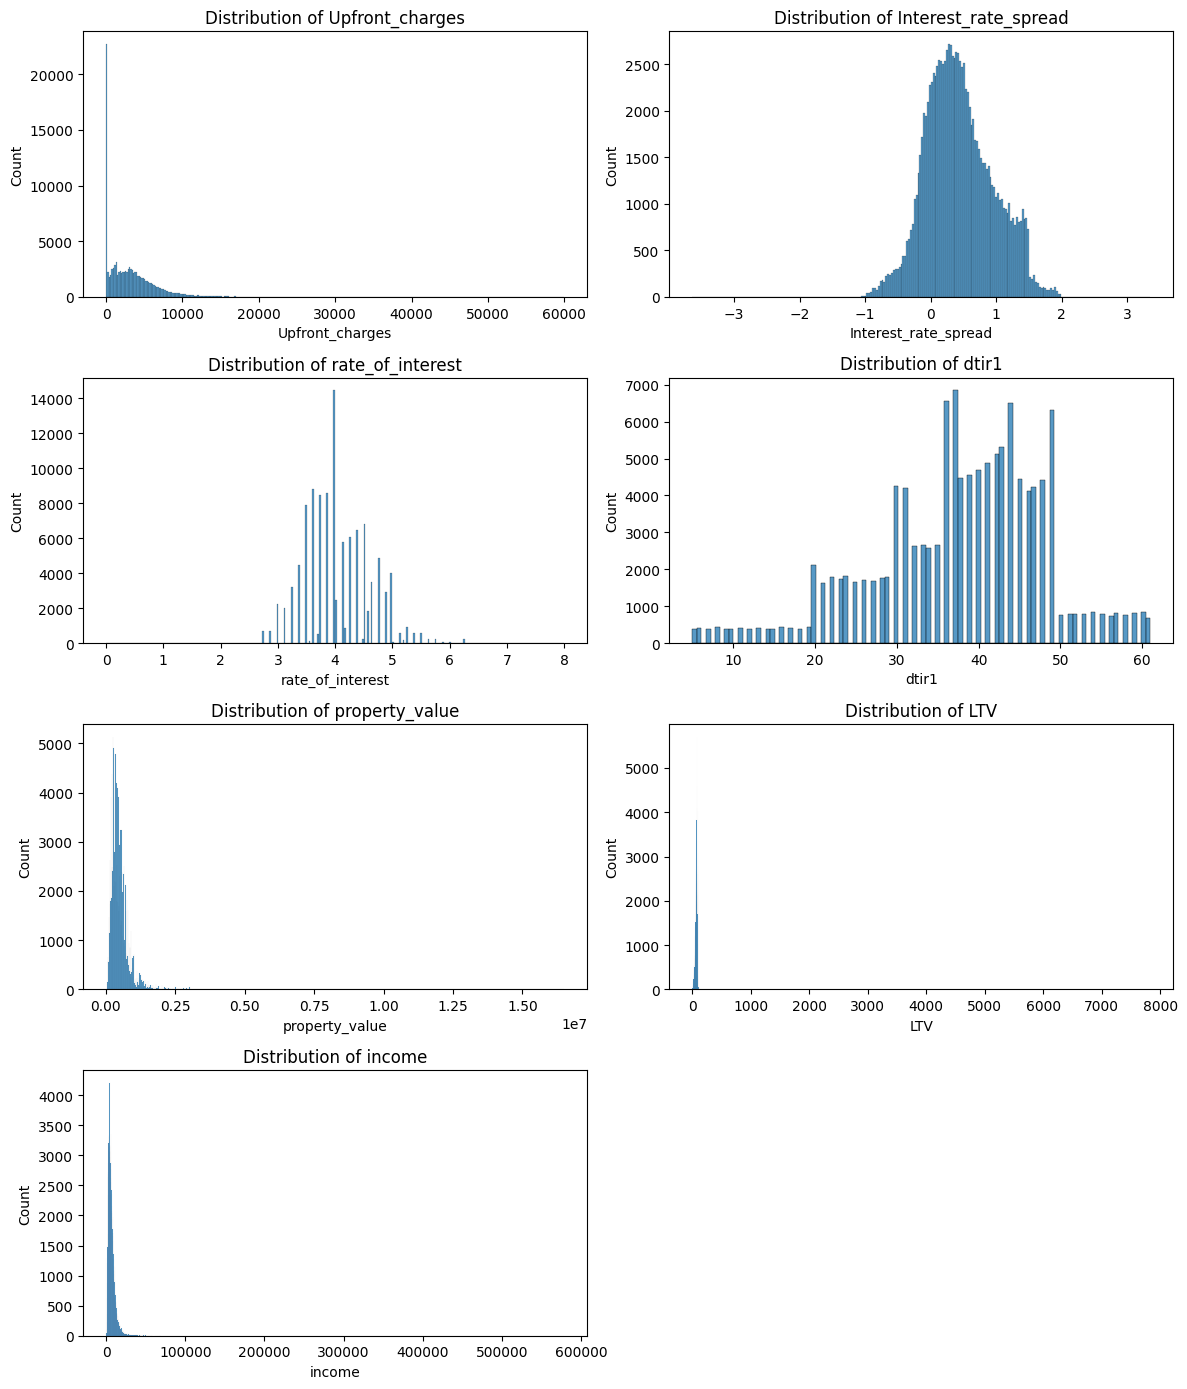

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏàòÏπòÌòï/Í≤∞Ï∏°Ïπò ÎßéÏùÄ 7Í∞ú Ï≤¥ÌÅ¨
col_list = ['Upfront_charges','Interest_rate_spread','rate_of_interest','dtir1','property_value','LTV','income']

# subplot ÏÑ§Ï†ï (4Ìñâ 2Ïó¥)
fig, axes = plt.subplots(4, 2, figsize=(12, 14))
axes = axes.flatten()  # 2D -> 1D array

# Í∞Å Ïª¨ÎüºÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
for i, col in enumerate(col_list):
    sns.histplot(Loan_Default_df[col], ax=axes[i], kde=False)
    axes[i].set_title(f"Distribution of {col}")

# Îπà subplot ÏßÄÏö∞Í∏∞ (ÎßàÏßÄÎßâ Ïπ∏)
for j in range(len(col_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Upfront_charges, property_value, LTV, income -> Ïã¨ÌïòÍ≤å Í∏∞Ïö∏Ïñ¥Ï†∏ ÏûàÏúºÎØÄÎ°ú logÎ≥ÄÌôò(log1p) Ìï¥ÏÑú missing-valueÏ±ÑÏö∞Í∏∞
# Interest_rate_spread, rate_of_interest, dtir1 -> Ï§ëÍ∞ÑÍ∞íÏúºÎ°ú Ï±ÑÏõåÎèÑ Îê† ÎìØ

In [ ]:
# (Ï∞∏Í≥†) ÌÅ¥ÎûòÏä§ Ï†ÑÏ≤òÎ¶¨ Î°úÏßÅ ÌôïÎ¶Ω Î™©Ï†ÅÏúºÎ°ú ÏàòÏπòÌòï Ïª¨Îüº skewnessÍ≥ÑÏÇ∞
# ÏàòÏπòÌòï Ïª¨ÎüºÎßå Ï∂îÏ∂ú
num_cols = Loan_Default_df.select_dtypes(include=['float64', 'int64']).columns
# skewness Í≥ÑÏÇ∞
skew_vals = Loan_Default_df[num_cols].skew()

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨ (Ï†àÎåìÍ∞í ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨)
skew_summary = skew_vals.abs().sort_values(ascending=False).to_frame(name='abs_skew')

# ÏõêÎûò skewness Í∞íÎèÑ Í∞ôÏù¥ Î≥¥Í∏∞
skew_summary['skew'] = skew_vals[skew_summary.index]

skew_summary

abs_skew        skew
LTV                   120.615337  120.615337
income                 17.307695   17.307695
property_value          4.586276    4.586276
term                    2.174822   -2.174822
Upfront_charges         1.754076    1.754076
loan_amount             1.666998    1.666998
Status                  1.176762    1.176762
dtir1                   0.551465   -0.551465
rate_of_interest        0.388406    0.388406
Interest_rate_spread    0.280762    0.280762
Credit_Score            0.004767    0.004767
year                    0.000000    0.000000
ID                      0.000000    0.000000

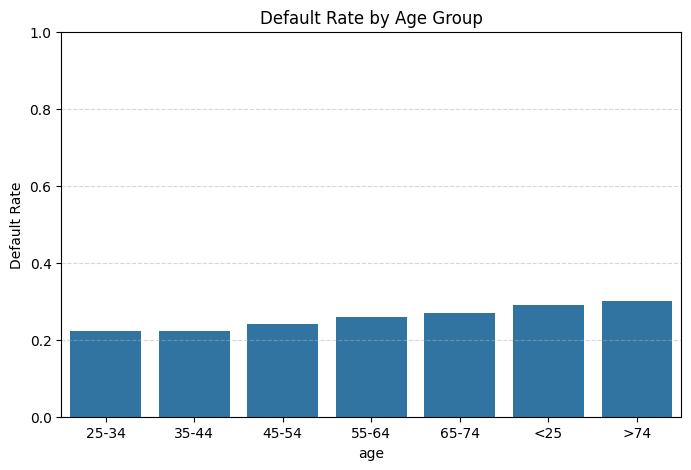

In [ ]:
# ageÍ∞Ä Ïò¨ÎùºÍ∞àÏàòÎ°ù, ÌååÏÇ∞ ÌôïÎ•†ÎèÑ Ïò¨ÎùºÍ∞ÄÎäî Í≤ΩÌñ• Ï°¥Ïû¨
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ÍµêÏ∞®ÌëúÎ°ú default ÎπÑÏú® Í≥ÑÏÇ∞
age_default_rate = pd.crosstab(Loan_Default_df['age'], Loan_Default_df['Status'], normalize='index')[1]

# ÏãúÎ¶¨Ï¶à ‚Üí DataFrame Î≥ÄÌôò
age_default_rate = age_default_rate.reset_index().rename(columns={1: 'default_rate'})

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.barplot(data=age_default_rate, x='age', y='default_rate', order=sorted(age_default_rate['age']))
plt.ylabel("Default Rate")
plt.title("Default Rate by Age Group")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 03 Data-Preprocessing

#### 03-01 Ï†ÑÏ≤òÎ¶¨ ÌÅ¥ÎûòÏä§ Ï†ïÏùò Î∞è Ï†ÅÏö©
- Ï†ÑÏ≤òÎ¶¨ ÌÅ¥ÎûòÏä§ Ï†ïÏùò?
  - Î∂àÌïÑÏöî Ïª¨Îüº ÏÇ≠Ï†ú
  - Í≤∞Ï∏°Ïπò ÎπÑÏú®, Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Îî∞Î•∏ Ï†ÑÏ≤òÎ¶¨ Î°úÏßÅ
    - Í≤∞Ï∏°Ïπò(1%)ÎØ∏Îßå, ÏàòÏπòÌòï -> Ï†úÍ±∞
    - Í≤∞Ï∏°Ïπò(1%)ÎØ∏Îßå, Î≤îÏ£ºÌòï -> Ï†úÍ±∞
    - Í≤∞Ï∏°Ïπò(1%)Ïù¥ÏÉÅ, ÏàòÏπòÌòï -> Ï§ëÍ∞ÑÍ∞í ÎòêÎäî skewnessÏã¨ÌïòÎ©¥ log1p Î≥ÄÌôò
    - Í≤∞Ï∏°Ïπò(1%)Ïù¥ÏÉÅ, Î≤îÏ£ºÌòï -> 'Unknown'Ïù¥ÎÇò 'Missing'ÏúºÎ°ú Ï≤òÎ¶¨

In [ ]:
class DataPreprocessor:
  def __init__(self,target_var,delete_var=None, test_rate=0.2, random_state=42,
               missing_value_rate=0.01, skewness_abs_criterion=2, log_transform_cols=None,scaling_method=None):
    # class Ï†ïÏùòÌï† Îïå test_rate=0.2 Ï≤òÎüº Ï¥àÍ∏∞Í∞íÏùÑ ÏûÖÎ†•Ìï¥Ï§òÏïºÌï®
    # Ïô∏Î∂ÄÏóêÏÑú Ï†ïÌïú Í∞íÏùÑ ÏßÅÏ†ë Ï∞∏Ï°∞ÌïòÎäî Íµ¨Ï°∞Í∞Ä ÏïÑÎãò
    self.target_var = target_var
    self.delete_var = delete_var if delete_var else []
    self.test_rate = test_rate
    self.random_state = random_state
    self.missing_value_rate = missing_value_rate
    self.skewness_abs_criterion = skewness_abs_criterion
    self.log_transform_cols = log_transform_cols if log_transform_cols is not None else []
    self.scaling_method = scaling_method.lower() if scaling_method else None

  def fit_transform(self, df):
    # fit_transformÏù¥ÎùºÎäî Îß§ÏÑúÎìú Ï†ïÏùò
    df = df.copy() # pandas warningÎ∞©ÏßÄ Ï∞®ÏõêÏóêÏÑú .copy()

    # 1. Drop delete_vars, Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
    df.drop(columns = self.delete_var, inplace = True, errors = 'ignore')

    # 2. Separate target
    y = df[self.target_var]  # ÏàòÏ†ïÎê®
    df.drop(columns=[self.target_var], inplace=True)  # ÏàòÏ†ïÎê®

    # 3. Column type ÎÇòÎàÑÍ∏∞(ÏàòÏπòÌòï, Î≤îÏ£ºÌòï)
    num_cols = df.select_dtypes(include = ['float64','int64']).columns
    cat_cols = df.select_dtypes(include = ['object']).columns

    # 4. log1p ÎåÄÏÉÅ ÏûêÎèô ÌåêÎã® (ÏóÜÏúºÎ©¥)
    if not self.log_transform_cols:
      skewed = df[num_cols].skew().abs()
      self.log_transform_cols = skewed[skewed > self.skewness_abs_criterion].index.tolist()

    # 5. Í≤∞Ï∏° ÎπÑÏú® Í∏∞Ï§Ä Ìñâ Ï†úÍ±∞
    missing_ratio = df.isnull().mean()
    cols_to_dropna = missing_ratio[missing_ratio < self.missing_value_rate].index.tolist()
    df.dropna(subset=cols_to_dropna, inplace=True)  # ÏàòÏ†ïÎê®
    y = y.loc[df.index]  # ÏàòÏ†ïÎê®: row ÏÇ≠Ï†ú ÌõÑ target Ïû¨Ï†ïÎ†¨

    # 6. ÎÇ®ÏùÄ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    for col in df.columns:
      if col in num_cols:
        if col in self.log_transform_cols:
          df[col] = df[col].clip(lower=0)  # ÏàòÏ†ïÎê®: ÏùåÏàò Î∞©ÏßÄ
          df[col] = np.log1p(df[col])
        df[col] = df[col].fillna(df[col].median())
      elif col in cat_cols:
        df[col] = df[col].fillna("Missing_value")

    # 7. Î≤îÏ£ºÌòï Î≥ÄÏàò One-Hot Ïù∏ÏΩîÎî©
    df_cat = pd.get_dummies(df[cat_cols], drop_first=True)
    df_num = df[num_cols]

    # 8. Scaling ÏÑ†ÌÉùÏ†Å
    if self.scaling_method:
      if self.scaling_method=='standard':
        scaler = StandardScaler()
      elif self.scaling_method=='min_max':
        scaler = MinMaxScaler()
      elif self.scaling_method=='robust':
        scaler = RobustScaler()
      else:
        raise ValueError("Unsupported scaling_method. Choose from 'standard', 'min_max', 'robust', or None.")

    # 9. ÌîºÏ≤ò Ï°∞Ìï©
    X = pd.concat([df_num, df_cat], axis=1) # yÎäî ÏïûÏóêÏÑú Ï†ïÏùòÌï®

    # üîß Ïª¨Îüº Ïù¥Î¶Ñ Ï†ïÏ†ú(xg-boost featureÎ¨∏Ï†ú Îïå)
    X.columns = clean_feature_names(X.columns)

    # 10. train-test split
    return train_test_split(X, y, test_size=self.test_rate,
                            random_state=self.random_state, stratify=y)


In [ ]:
prep = DataPreprocessor(
    target_var='Status',
    delete_var=['ID', 'year','credit_type_EQUI','Interest_rate_spread','Upfront_charges','Secured_by','Security_Type'],
    test_rate=0.2,
    random_state=42,
    missing_value_rate=0.01,
    skewness_abs_criterion=2,
    scaling_method = 'standard'
)
## Random-Forest ÏÑ±Îä•ÏßÄÌëúÍ∞Ä Î™®Îëê 1ÏùÑ Ï∞çÏñ¥ÏÑú Î≥ÄÏàò Ï°∞Ï†ï

## ÏïÑÎûò Î≥ÄÏàòÎì§ÏùÄ ÏÇ¨Ïã§ÏÉÅ Î™®ÌòïÏóê Ï†ïÎãµÏùÑ ÏïåÎ†§Ï£ºÎäî Î≥ÄÏàò(over-fittingÎ¨∏Ï†ú)
# credit_type_EQUI	targetÏù¥ 1Ïùº ÎïåÎßå Îì±Ïû•
# Interest_rate_spread	Í∞í ÌïòÎÇòÎ°ú Í±∞Ïùò Ïù¥ÏßÑ Î∂ÑÎ¶¨ Í∞ÄÎä•
# Upfront_charges	Ìù¨Í∑ÄÍ∞íÏóêÏÑú ÏôÑÏ†ÑÎ∂ÑÎ¶¨ Îã§Ïàò
# Secured_by	"land" ‚Üí Î™®Îëê Î∂àÎüâ (Status=1), Ïã¨Í∞ÅÌïú Í∑úÏπôÏÑ±
# Security_Type	"Indriect"Ïùº Í≤ΩÏö∞ Î™®Îëê default

# ÏúÑ Îã§ÏÑØ Î≥ÄÏàòÍ∞Ä Îã§ Îì§Ïñ¥Í∞Ä ÏûàÎäî Í≤ΩÏö∞ Î™®Îì† ÏÑ±Îä•ÏßÄÌëúÍ∞Ä 1ÏùÑ Ï∞çÏùå

X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

In [ ]:
X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

In [ ]:
print(f'trainÎç∞Ïù¥ÌÑ∞ Ïàò: {X_train.shape[0]}')
print(f'testÎç∞Ïù¥ÌÑ∞ Ïàò: {X_test.shape[0]}')

trainÎç∞Ïù¥ÌÑ∞ Ïàò: 117819
testÎç∞Ïù¥ÌÑ∞ Ïàò: 29455


In [ ]:
print(f'trainÏóêÏÑú 1Ïùò ÎπÑÏú®: {round(y_train.sum()/len(y_train),4)}')
print(f'testÏóêÏÑú 1Ïùò ÎπÑÏú®: {round(y_test.sum()/len(y_test),4)}') # ÏÇ¨Ïã§ Ïù¥ Ï†ïÎèÑ imbalanceÎ©¥ Íµ≥Ïù¥ over/under samplingÍ≥†ÎØº ÌïòÏßÄ ÏïäÏïÑÎèÑ Îê† ÎìØ!

trainÏóêÏÑú 1Ïùò ÎπÑÏú®: 0.2453
testÏóêÏÑú 1Ïùò ÎπÑÏú®: 0.2453


### 04 Under(Over) sampling
- Undersampling: Îã§Ïàò ÌÅ¥ÎûòÏä§Ïùò ÏÉòÌîåÏùÑ Ï§ÑÏó¨ ÌÅ¥ÎûòÏä§ Í∞Ñ Í∑†ÌòïÏùÑ ÎßûÏ∂îÎäî Î∞©Ïãù
- Oversampling: ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïùò ÏÉòÌîåÏùÑ ÎäòÎ†§ ÌÅ¥ÎûòÏä§ Í∞Ñ Í∑†ÌòïÏùÑ ÎßûÏ∂îÎäî Î∞©Ïãù (ex. SMOTE)
- Í∞ïÏùò ÏûêÎ£åÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Îã®Í≥ÑÏóêÏÑú Ïñ∏Îçî/Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ ÏàòÌñâÌïúÎã§Í≥† ÏÜåÍ∞ú
  - train/test Î∂ÑÌï† Ïù¥Ï†ÑÏóê ÏÉòÌîåÎßÅÏùÑ ÏàòÌñâÌïòÎ©¥ Ïã¨Í∞ÅÌïú Î¨∏Ï†ú Î∞úÏÉù
  - train/test split Ïù¥Ï†ÑÏóê ÏÉòÌîåÎßÅÏùÑ ÏàòÌñâÌïòÎ©¥, test Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÎ∂Ä Ï†ïÎ≥¥Í∞Ä ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Î∞òÏòÅ(Data Leakage)
- Îçî ÎÇòÏùÄ Ï†àÏ∞®Îäî ÏïÑÎûòÏôÄ Í∞ôÏùå(gpt/gemini)
  - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Î®ºÏ†Ä train/testÎ°ú Î∂ÑÌï†
  - train Îç∞Ïù¥ÌÑ∞ÏóêÎßå under/over sampling Ï†ÅÏö©
  - Î™®Îç∏ ÌïôÏäµÏùÄ ÏÉòÌîåÎßÅÎêú train Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©
  - Î™®Îç∏ ÌèâÍ∞Ä ÏãúÏóêÎäî ÏÉòÌîåÎßÅÏù¥ Ï†ÅÏö©ÎêòÏßÄ ÏïäÏùÄ ÏõêÎûò test Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©
- ÏÉÅÍ∏∞ Í∑ºÍ±∞Î°ú, ÏàòÏóÖ ÎÇ¥Ïö©ÏóêÏÑú Í∞ÄÏù¥Îìú Îêú Í≤ÉÍ≥º Îã§Î•¥Í≤å train/test split Ïù¥ÌõÑ
  Under(Over)samplingÏùÑ ÏàòÌñâÌïòÍ≥†Ïûê Ìï®

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. Ïñ∏ÎçîÏÉòÌîåÎßÅ Í∞ùÏ≤¥ ÏÉùÏÑ±
rus = RandomUnderSampler(random_state=42)

# 2. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï†ÅÏö©
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# 3. Í≤∞Í≥º ÌôïÏù∏
print('Before undersampling:', Counter(y_train))
print('After undersampling:', Counter(y_train_resampled))

Before undersampling: Counter({0: 88920, 1: 28899})
After undersampling: Counter({0: 28899, 1: 28899})


### 05 Î™®Îç∏ ÏÑ±Îä•Ïã§Ìóò
- Î°úÏßÄÏä§Ìã±
  - Í∑∏ÎåÄÎ°ú ÌñàÏùÑ Îïå(iter=2000, 109Ï¥à)
    - Accuracy : 0.8701
    - Precision : 0.93(positive class=1)
    - Recall : 0.51(positive class=1)
    - F1-score :0.6597(positive class=1)
  - UnderSampling(iter=2000, 76Ï¥à)
    - Accuracy : 0.8237
    - Precision : 0.63(positive class=1)
    - Recall : 0.67(positive class=1)
    - F1-score :0.6505(positive class=1)
- RandomForest
  - Í∑∏ÎåÄÎ°ú ÌñàÏùÑ Îïå(20.19Ï¥à)
    - Accuracy : 0.9340
    - Precision : 0.89(positive class=1)
    - Recall : 0.83(positive class=1)
    - F1-score :0.8609(positive class=1)
  - UnderSampling(7.38Ï¥à)
    - Accuracy : 0.9164
    - Precision : 0.75(positive class=1)
    - Recall : 0.98(positive class=1)
    - F1-score :0.8515(positive class=1)
- GraidentBoosting
  - Í∑∏ÎåÄÎ°ú ÌñàÏùÑ Îïå(35.7Ï¥à)
    - Accuracy : 0.9301
    - Precision : 0.87(positive class=1)
    - Recall : 0.84(positive class=1)
    - F1-score :0.8557(positive class=1)
  - UnderSampling(13.9Ï¥à)
    - Accuracy : 0.9012
    - Precision : 0.71(positive class=1)
    - Recall : 1.00(positive class=1)
    - F1-score :0.8323(positive class=1)
- XGBoost
  - Í∑∏ÎåÄÎ°ú ÌñàÏùÑ Îïå(1.76Ï¥à)
    - Accuracy : 0.9335
    - Precision : 0.87(positive class=1)
    - Recall : 0.86(positive class=1)
    - F1-score :0.8636(positive class=1)
  - UnderSampling
    - Accuracy : 0.9056
    - Precision : 0.72(positive class=1)
    - Recall : 1.00(positive class=1)
    - F1-score :0.8382(positive class=1)

- ÏãúÏÇ¨Ï†ê
  - Î°úÏßÄÏä§Ìã± : UndersamplingÏãú, precisionÎÇÆÏïÑÏßÄÍ≥† recall Ïò§Î¶Ñ
  - RandomForest, GradientBoosting, XG-boostingÎèÑ Î°úÏßÄÏä§Ìã±Í≥º Í∞ôÏùÄ Í≤ΩÌñ• Î≥¥ÏûÑ
  - F1-scoreÍ∞Ä Î™®Îì† Í≤ΩÏö∞Ïóê ÏûàÏñ¥ÏÑú Í∑ºÏÜåÌïòÍ≤åÎÇòÎßà ÎÇÆÏïÑÏßê

#### 05-01 ÌèâÍ∞ÄÌï®Ïàò Ï†ïÏùò

In [ ]:
# Ï†ÑÏ†ú: undersampling ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞
# X_train_resampled, y_train_resampled  ‚Üê train set (undersampled)
# X_test, y_test                        ‚Üê test set (original)

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # pip install xgboost

In [ ]:
import time

def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    model.fit(X_train, y_train)

    train_time = time.time() - start_time

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Î™®Îç∏: {model.__class__.__name__}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: {train_time:.2f}Ï¥à")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

#### 05-02 Î™®Îç∏ ÌèâÍ∞Ä

##### Î°úÏßÄÏä§Ìã±

In [ ]:
# Logistic Regression
log_reg_1 = LogisticRegression(max_iter=2000, random_state=42)
evaluate_model(log_reg_1, X_train, y_train, X_test, y_test)

Î™®Îç∏: LogisticRegression
Accuracy: 0.8701
F1 Score: 0.6579
ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: 107.41Ï¥à
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     22230
           1       0.93      0.51      0.66      7225

    accuracy                           0.87     29455
   macro avg       0.90      0.75      0.79     29455
weighted avg       0.88      0.87      0.86     29455

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=2000, random_state=42)
evaluate_model(log_reg, X_train_resampled, y_train_resampled, X_test, y_test)

Î™®Îç∏: LogisticRegression
Accuracy: 0.8237
F1 Score: 0.6505
ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: 76.36Ï¥à
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     22230
           1       0.63      0.67      0.65      7225

    accuracy                           0.82     29455
   macro avg       0.76      0.77      0.77     29455
weighted avg       0.83      0.82      0.83     29455

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### RandomForest

In [ ]:
# Random Forest
rf_1 = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_1, X_train, y_train, X_test, y_test)

Î™®Îç∏: RandomForestClassifier
Accuracy: 0.9340
F1 Score: 0.8609
ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: 27.12Ï¥à
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22230
           1       0.89      0.83      0.86      7225

    accuracy                           0.93     29455
   macro avg       0.92      0.90      0.91     29455
weighted avg       0.93      0.93      0.93     29455

--------------------------------------------------


In [ ]:
# Random Forest
rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_2, X_train_resampled, y_train_resampled, X_test, y_test)

Î™®Îç∏: RandomForestClassifier
Accuracy: 0.9164
F1 Score: 0.8515
ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: 8.53Ï¥à
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     22230
           1       0.75      0.98      0.85      7225

    accuracy                           0.92     29455
   macro avg       0.87      0.94      0.90     29455
weighted avg       0.93      0.92      0.92     29455

--------------------------------------------------


##### GradientBoosting

In [ ]:
# Gradient Boosting
gb_1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model(gb_1, X_train, y_train, X_test, y_test)

Î™®Îç∏: GradientBoostingClassifier
Accuracy: 0.9301
F1 Score: 0.8557
ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: 31.04Ï¥à
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22230
           1       0.87      0.84      0.86      7225

    accuracy                           0.93     29455
   macro avg       0.91      0.90      0.90     29455
weighted avg       0.93      0.93      0.93     29455

--------------------------------------------------


In [ ]:
# Gradient Boosting
gb_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model(gb_2, X_train_resampled, y_train_resampled, X_test, y_test)

Î™®Îç∏: GradientBoostingClassifier
Accuracy: 0.9012
F1 Score: 0.8323
ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: 13.57Ï¥à
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     22230
           1       0.71      1.00      0.83      7225

    accuracy                           0.90     29455
   macro avg       0.86      0.93      0.88     29455
weighted avg       0.93      0.90      0.91     29455

--------------------------------------------------


##### XG-boost

In [ ]:
# XGBoost
xgb_1 = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42)
evaluate_model(xgb_1, X_train, y_train, X_test, y_test)

Î™®Îç∏: XGBClassifier
Accuracy: 0.9335
F1 Score: 0.8636
ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: 1.74Ï¥à
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     22230
           1       0.87      0.86      0.86      7225

    accuracy                           0.93     29455
   macro avg       0.91      0.91      0.91     29455
weighted avg       0.93      0.93      0.93     29455

--------------------------------------------------


In [ ]:
# XGBoost
xgb_2 = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42)
evaluate_model(xgb_2, X_train_resampled, y_train_resampled, X_test, y_test)

Î™®Îç∏: XGBClassifier
Accuracy: 0.9056
F1 Score: 0.8382
ÌïôÏäµ ÏÜåÏöî ÏãúÍ∞Ñ: 6.17Ï¥à
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     22230
           1       0.72      1.00      0.84      7225

    accuracy                           0.91     29455
   macro avg       0.86      0.94      0.89     29455
weighted avg       0.93      0.91      0.91     29455

--------------------------------------------------
